In [1]:
from io import BytesIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from azure.storage.blob import BlobServiceClient

In [2]:
from src.paychex_ml.utils import load_credentials
from src.paychex_ml.ts_diagnosis import stationarity_test
from src.paychex_ml.ts_diagnosis import adfuller_test

In [3]:
credentials = load_credentials("blob_storage",
                               file="C:/Users/bruno.gonzalez/DataspellProjects/Paychex_revenue_forecast/credentials.yml")

In [4]:
# Start client
container_name = "clean-data"
blob_service_client = BlobServiceClient.from_connection_string(credentials['conn_string'])
container_client = blob_service_client.get_container_client(container_name)

In [5]:
# Download file
file = 'paychex_revenue.parquet'
stream_downloader = container_client.download_blob(file)
stream = BytesIO()
stream_downloader.readinto(stream)

33286

In [6]:
df = pd.read_parquet(stream, engine='pyarrow')
df['Calendar Date'] = pd.PeriodIndex(df['Calendar Date'], freq='M')
df = df.set_index('Calendar Date')
df_month = df[df['Scenario']=='Actual']
#df_month = df_month.select_dtypes(include=np.number)

In [7]:
df_month

,Scenario,Version,Fiscal Period,11 Payroll Blended Products,12 W2 Revenue,13 Delivery Revenue,14 ASO Allocation,15 Other Processing Revenue,16 SurePayroll,17 Total International,20 Total 401k,31 HR Solutions (excl PEO),40 Total Online Services,50 Other Managment Solutions,60 Total PEO,70 Total Insurance Services,80 Interest on Funds Held for Clients
Calendar Date,,,,,,,,,,,,,,,,,
2014-06,Actual,Final Revised,FY1501,99633512.0,7211830.38,7393351.97,7255027.55,4966982.64,3246967.02,808003.64,14883414.0,21143605.0,8581821.0,6350954.0,12948698.0,10084069.0,3308153.0
2014-07,Actual,Final Revised,FY1502,121619696.0,7507480.62,13513741.18,9070820.80,6755141.12,3362473.02,855305.18,15071771.0,25838048.0,9700908.0,7011081.0,14670280.0,10353254.0,3466374.0
2014-08,Actual,Final Revised,FY1503,99472483.0,7625158.09,7286966.62,7489159.50,4393517.15,3286111.93,801651.38,14783933.0,21762760.0,8726405.0,6765242.0,14606683.0,10968738.0,3434418.0
2014-09,Actual,Final Revised,FY1504,94198230.0,7596134.70,7081861.96,7011292.24,4898467.76,3345328.53,834334.16,17075301.0,20288451.0,8945846.0,6369484.0,14456324.0,11250149.0,3419918.0
2014-10,Actual,Final Revised,FY1505,124353873.0,8001947.62,13741077.44,9372927.59,6711628.57,3402641.78,869205.85,18252956.0,26755143.0,10156903.0,7345929.0,14544807.0,11859545.0,3472038.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01,Actual,Final Revised,FY2108,94834624.0,81385298.15,22548298.89,13265382.71,9346997.99,7062932.96,4373773.19,23143326.0,38395293.0,15194875.0,21106947.0,71734133.0,14156734.0,5034426.0
2021-02,Actual,Final Revised,FY2109,96978102.0,21371.31,6430193.76,13666646.86,7187243.82,6757198.28,4321140.10,23583891.0,39462133.0,14293257.0,27578999.0,65858228.0,14634736.0,4984652.0
2021-03,Actual,Final Revised,FY2110,110554131.0,-46882.30,7657980.44,16053700.85,7417140.01,7127288.42,4330584.30,24032102.0,45766968.0,16081475.0,23814271.0,70139851.0,17799883.0,5028117.0


<ipython-input-8-85f0037a038b>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-8-85f0037a038b>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-8-85f0037a038b>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-8-85f0037a038b>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-8-85f0037a038b>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-8-85f0037a038b>:3: UserWarning: Matplotlib is currently

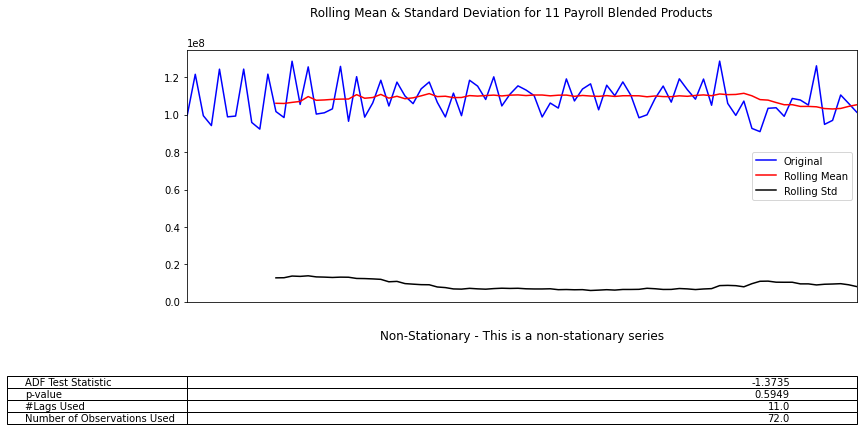

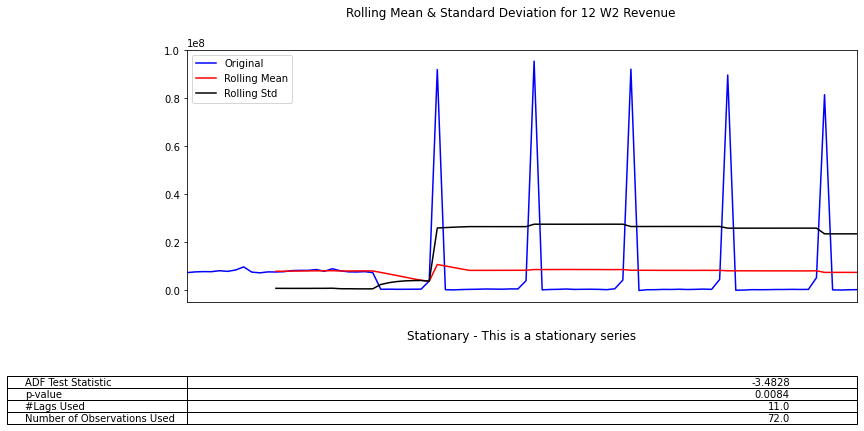

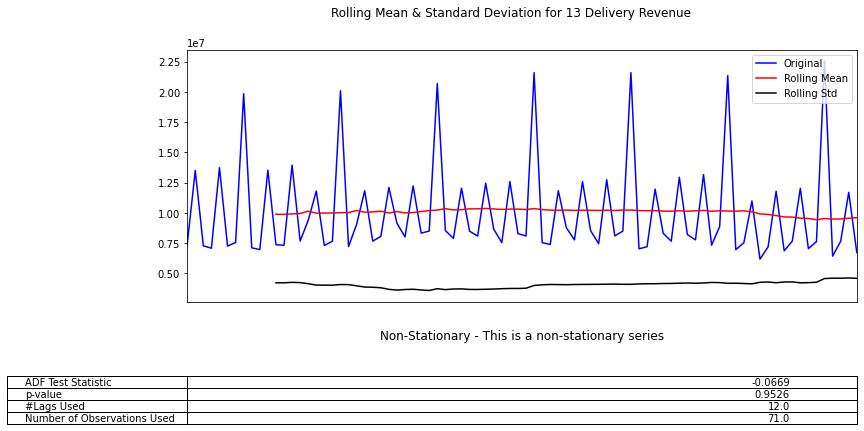

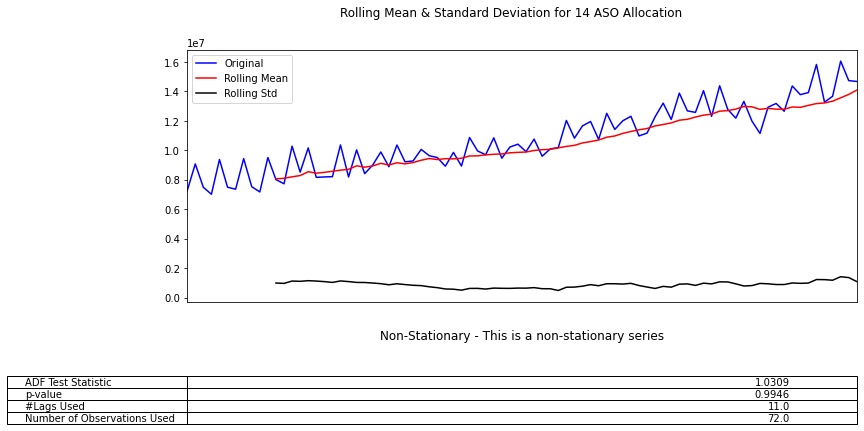

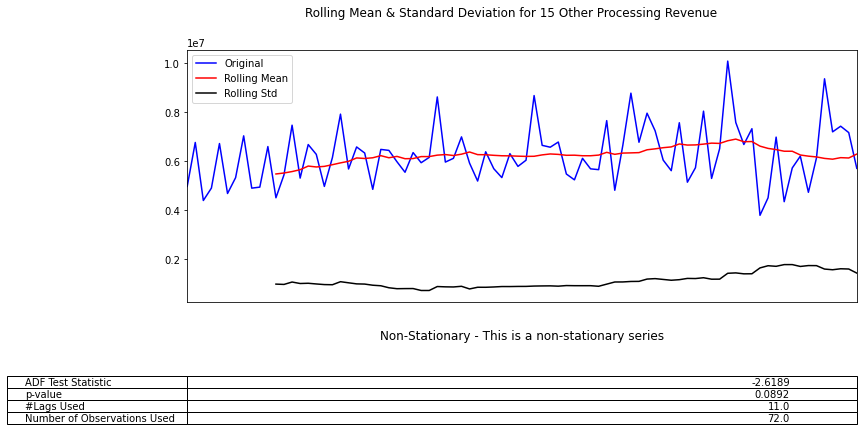

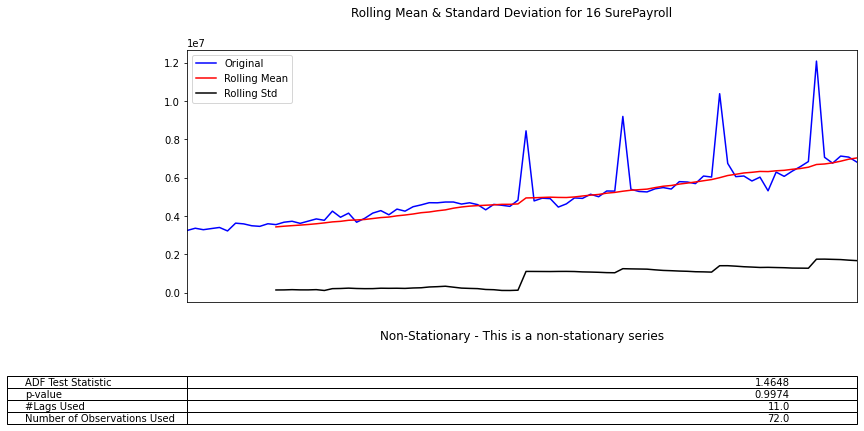

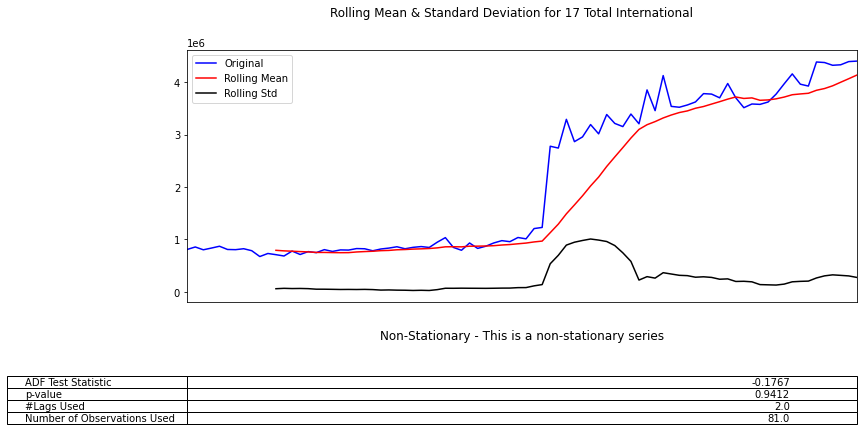

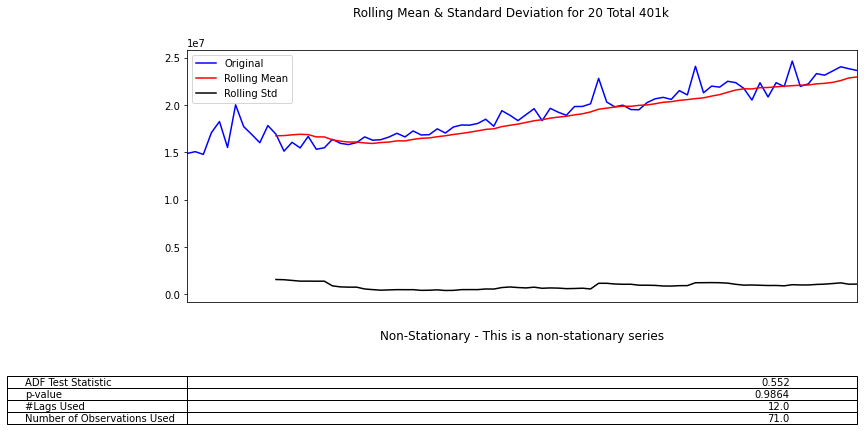

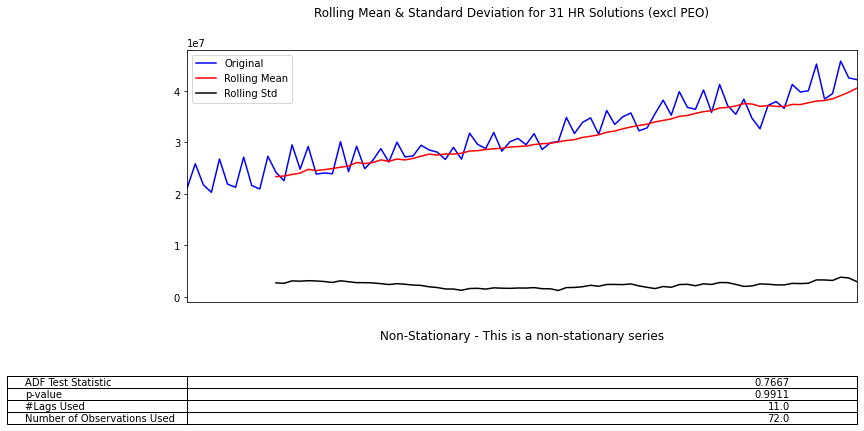

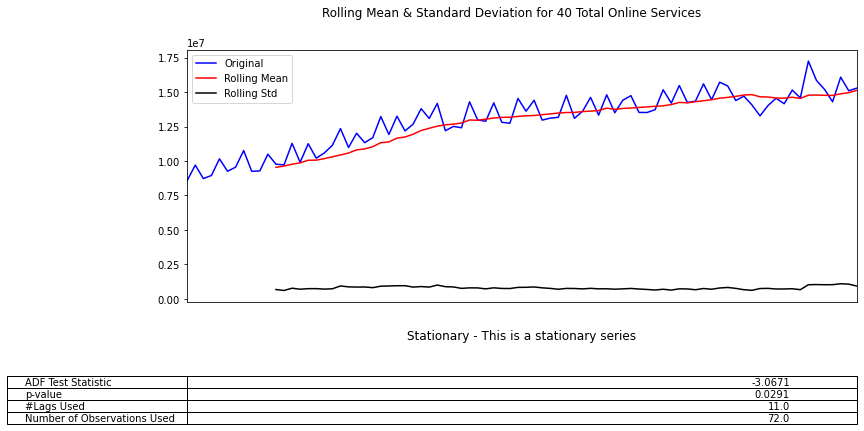

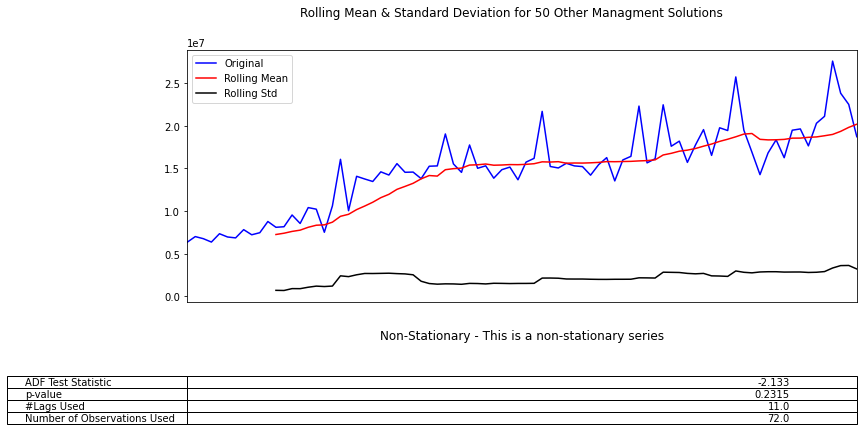

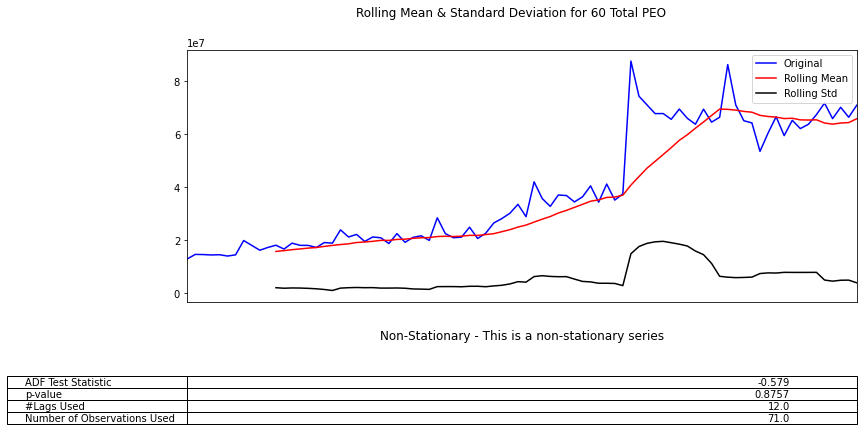

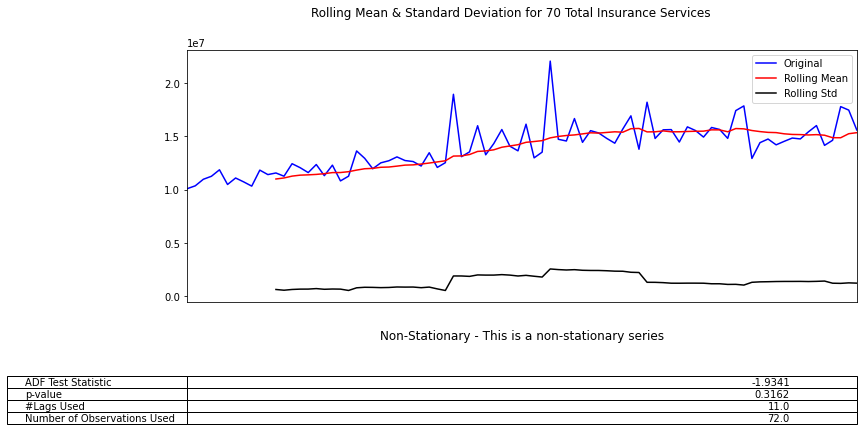

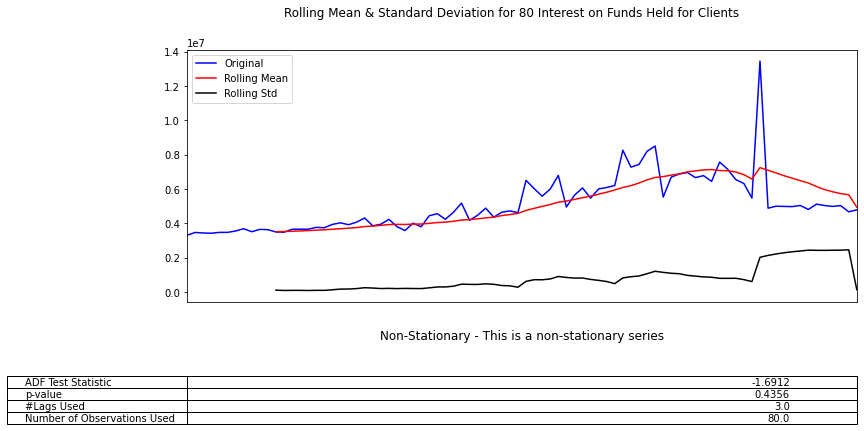

In [8]:
for c in df_month.select_dtypes(include=np.number).columns:
    fig = stationarity_test(df_month[c])
    fig.show()

